# Warehouse Optimization (Model Only)

## Initilization

In [83]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'SaleRate','Profit','Soldout/not','Sold_day'], axis=1)
data

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRateNew,Qty_Remaining
0,iMicro,Cartridge & Toner,Hardware & Software,Printer & Scanner,Cartridge & Toner,17.94,13.455,3,2.5,1.48,0.333333,0
1,Cougar,Mouse Pad,Component,Input & Output Device,Mouse Pad,20.50,15.375,3,2.5,1.00,0.333333,0
2,ASUS,Wireless Router,Component,Networking,Wireless Networking,25.62,19.215,3,2.5,1.02,0.333333,0
3,Dynatron,Server,Component,Fan & Heatsink,CPU Fan & Heatsink,32.80,24.600,3,2.5,0.99,0.333333,0
4,Linksys,Wireless Router,Component,Networking,Wireless Networking,41.00,30.750,3,2.5,1.40,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,SUPER TALENT,Server DDR3,Component,DRAM Memory,Server DRAM,76.88,57.660,1,0.0,0.08,0.100000,0
4196,QNAP,Server,Component,Power Supply,Server,142.00,106.500,1,2.5,3.00,0.100000,0
4197,Supermicro,1U,Component,Server,Server Barebone,105.00,78.750,1,0.0,0.00,0.142857,0
4198,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,119.92,89.940,1,2.5,2.00,0.142857,0


In [ ]:
data2 = data.copy()

In [84]:
# limit to categorical data
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

## One-Hot Encoding

In [85]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)

(4200, 458)


In [86]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

In [146]:
ordinal_data.shape

(4200, 7)

In [147]:
print(encoded_data.shape)

(4200, 465)


In [87]:
encoded_data.columns

Index([   'Price(USD)',    'Cost price',     'Inventory',      'Shipping',
          'weight(lb)',   'SaleRateNew', 'Qty_Remaining',               0,
                     1,               2,
       ...
                   448,             449,             450,             451,
                   452,             453,             454,             455,
                   456,             457],
      dtype='object', length=465)

In [88]:
encoded_data.head(30)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),SaleRateNew,Qty_Remaining,0,1,2,...,448,449,450,451,452,453,454,455,456,457
0,17.94,13.4550,3,2.5,1.48,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.50,15.3750,3,2.5,1.00,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.62,19.2150,3,2.5,1.02,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32.80,24.6000,3,2.5,0.99,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.00,30.7500,3,2.5,1.40,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,60.47,45.3525,2,2.5,0.21,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,217.30,162.9750,2,2.5,0.50,0.333333,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.10,3.1000,1,0.0,0.42,0.166667,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30.75,23.0625,1,2.5,1.28,0.166667,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.10,3.0750,1,0.0,0.13,0.125000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
#Library Import
import random
import pandas as pd
import numpy as np
import pickle
from math import sqrt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve

## Data Split

In [138]:
X = encoded_data.drop('SaleRateNew', axis=1)
Y = encoded_data['SaleRateNew']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state = 1)
X_train.head(5)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),Qty_Remaining,0,1,2,3,...,448,449,450,451,452,453,454,455,456,457
2490,3276.92,2457.6900,6,10.0,172.00,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3291,194.75,146.0625,1,2.5,0.55,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,184.50,138.3750,9,2.5,5.00,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1672,18.45,13.8375,7,2.5,0.37,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
255,203.98,152.9850,12,10.0,36.00,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Training with validation 

In [140]:
from matplotlib import pyplot as plt
%matplotlib inline

def train(models, X, Y, iterations = 5):
    results = {}
    for i in models:
        print("\nRunning ", i)
        r2_train = []
        r2_val = []
        mae_train = []
        mae_val = []
        mse_train = []
        mse_val = []
        mabe_train = []
        mabe_val = []
        mevs_train = []
        mevs_val = []
        for j in range(1, iterations):
            print(j, end='')
            h = int(4200/iterations*j)
            r2_val.append(metrics.r2_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            r2_train.append(metrics.r2_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mae_val.append(metrics.mean_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mae_train.append(metrics.mean_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mse_val.append(metrics.mean_squared_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mse_train.append(metrics.mean_squared_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mabe_val.append(metrics.median_absolute_error(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mabe_train.append(metrics.median_absolute_error(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_train)))
            mevs_val.append(metrics.explained_variance_score(y_val,
                                            models[i].fit(X_train.head(h), 
                                                         y_train.head(h)).predict(X_val)))
            mevs_train.append(metrics.explained_variance_score(y_train, 
                                            models[i].fit(X_train.head(h), 
                                                    y_train.head(h)).predict(X_train)))
            
#R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(r2_train, label='train')
        ax.plot(r2_val, label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
#mae
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mae_train, label='train')
        ax.plot(mae_val, label='test')
        plt.title("mean_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mse
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mse_train, label='train')
        ax.plot(mse_val, label='val')
        plt.title("mean_squared_error_train-val " + i)
        ax.legend()
        plt.figure()
#mabe        
        fig, ax = plt.subplots() 
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mabe_train, label='train')
        ax.plot(mabe_val, label='val')
        plt.title("median_absolute_error_train-val " + i)
        ax.legend()
        plt.figure()
#mevs
        fig, ax = plt.subplots()
        plt.xlabel('Iterations') 
        plt.ylabel('Score')
        ax.plot(mevs_train, label='train')
        ax.plot(mevs_val, label='val')
        plt.title("explained_variance_score_train-val " + i)
        ax.legend()
        plt.figure()
        
        results[i] = [r2_val[-1],r2_train[-1],mae_val[-1],mae_train[-1],mse_val[-1],mse_train[-1],mabe_val[-1],mabe_train[-1],
                      mevs_val[-1],mevs_train[-1]]
    return pd.DataFrame(results), models

In [141]:
models = {'ElasticNet': linear_model.ElasticNet(),
          'Lasso': linear_model.Lasso(),
          'Ridge': linear_model.Ridge(),
          'GBM': GradientBoostingRegressor(),
          'ada': AdaBoostRegressor(),
          'RFR':RandomForestRegressor()}


Running  ElasticNet
1234
Running  Lasso
1234
Running  Ridge
1234
Running  GBM
1234
Running  ada
1234
Running  RFR
1234Wall time: 4min 12s


,ElasticNet,Lasso,Ridge,GBM,ada,RFR
0,0.677083,0.668633,0.684639,0.919783,0.906465,0.911692
1,0.779642,0.776833,0.811136,0.958033,0.919757,0.988922
2,0.419234,0.427152,0.402497,0.177772,0.212009,0.174882
3,0.396797,0.402444,0.349878,0.142914,0.231616,0.060675
4,0.342249,0.351205,0.334241,0.084810,0.094721,0.091551
5,0.279468,0.283031,0.239527,0.053224,0.082141,0.014182
6,0.332637,0.344961,0.285223,0.070346,0.084095,0.065637
7,0.335032,0.344041,0.275520,0.064758,0.175874,0.016759
8,0.680342,0.672044,0.687539,0.920275,0.912454,0.913997
9,0.779642,0.776833,0.811136,0.958033,0.937630,0.988678


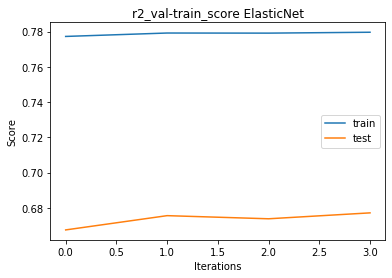

<Figure size 432x288 with 0 Axes>

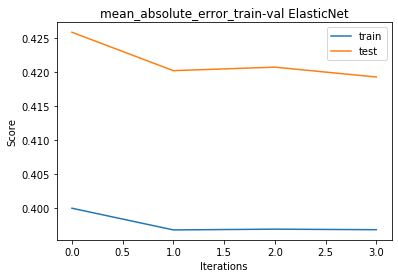

<Figure size 432x288 with 0 Axes>

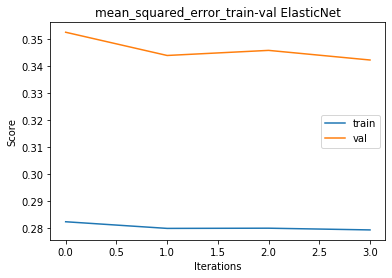

<Figure size 432x288 with 0 Axes>

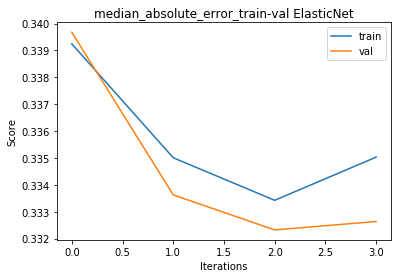

<Figure size 432x288 with 0 Axes>

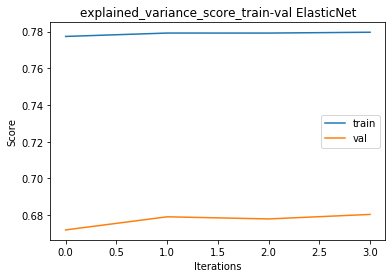

<Figure size 432x288 with 0 Axes>

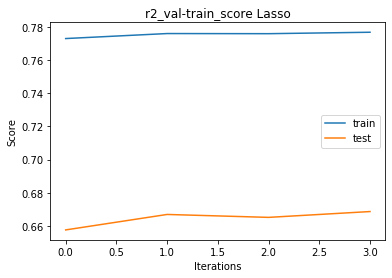

<Figure size 432x288 with 0 Axes>

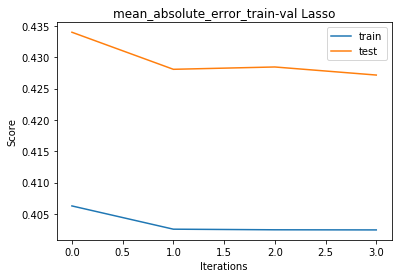

<Figure size 432x288 with 0 Axes>

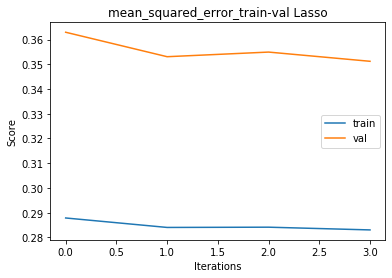

<Figure size 432x288 with 0 Axes>

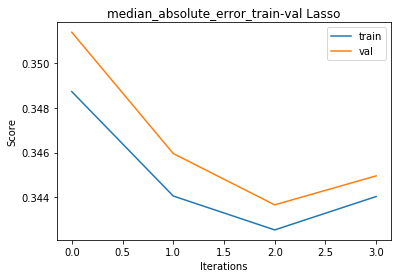

<Figure size 432x288 with 0 Axes>

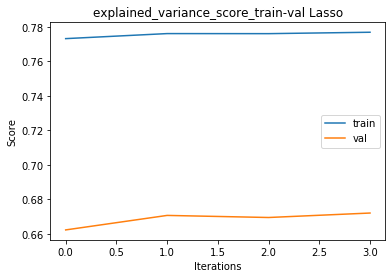

<Figure size 432x288 with 0 Axes>

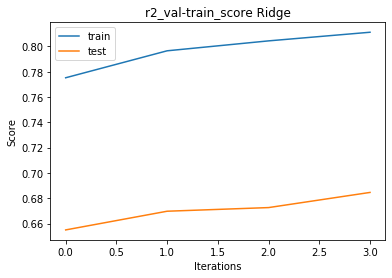

<Figure size 432x288 with 0 Axes>

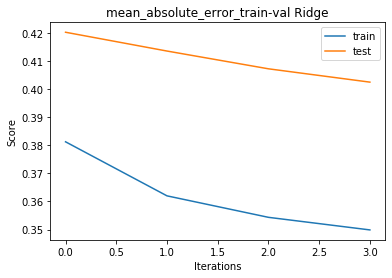

<Figure size 432x288 with 0 Axes>

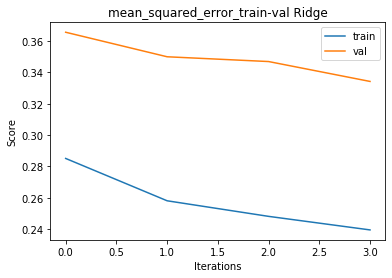

<Figure size 432x288 with 0 Axes>

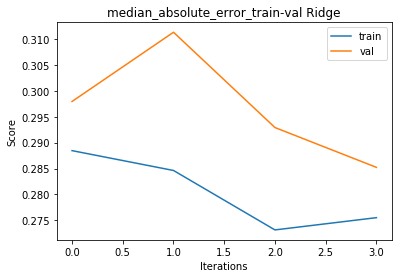

<Figure size 432x288 with 0 Axes>

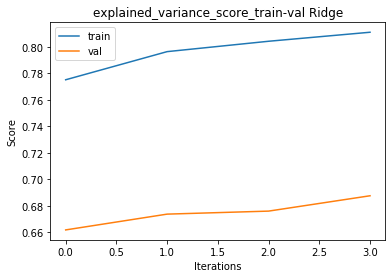

<Figure size 432x288 with 0 Axes>

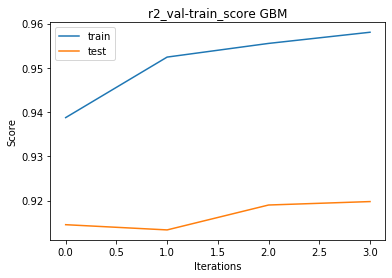

<Figure size 432x288 with 0 Axes>

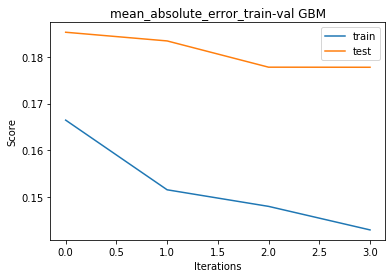

<Figure size 432x288 with 0 Axes>

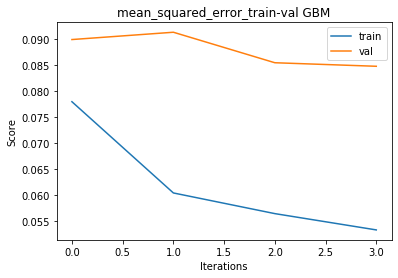

<Figure size 432x288 with 0 Axes>

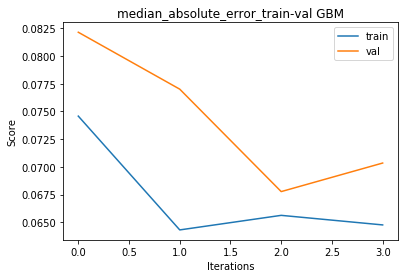

<Figure size 432x288 with 0 Axes>

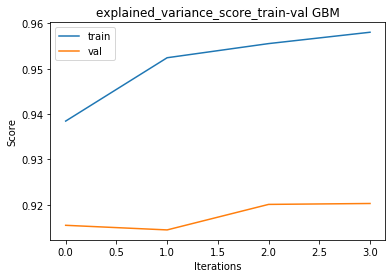

<Figure size 432x288 with 0 Axes>

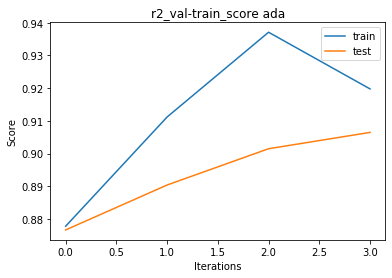

<Figure size 432x288 with 0 Axes>

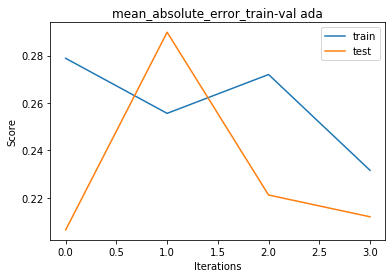

<Figure size 432x288 with 0 Axes>

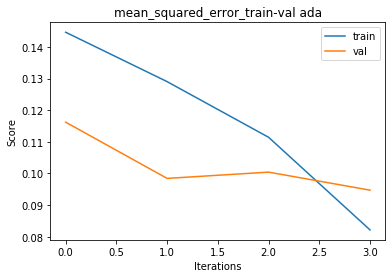

<Figure size 432x288 with 0 Axes>

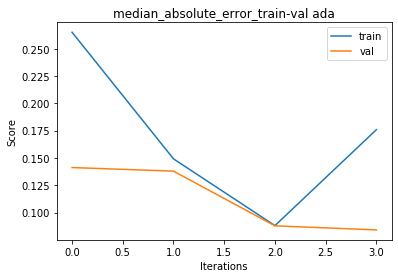

<Figure size 432x288 with 0 Axes>

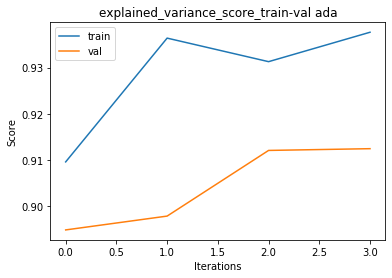

<Figure size 432x288 with 0 Axes>

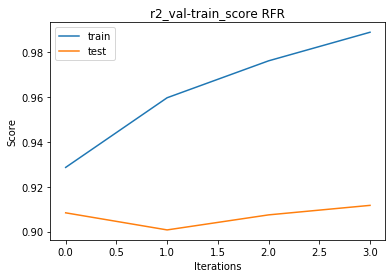

<Figure size 432x288 with 0 Axes>

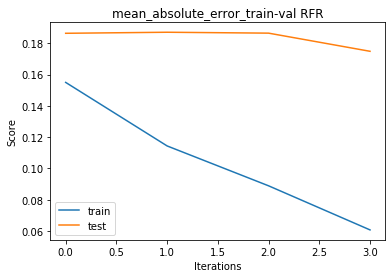

<Figure size 432x288 with 0 Axes>

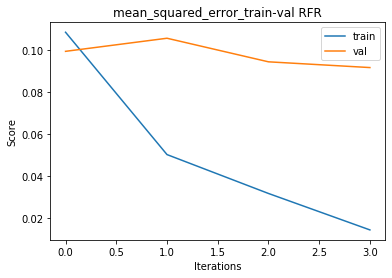

<Figure size 432x288 with 0 Axes>

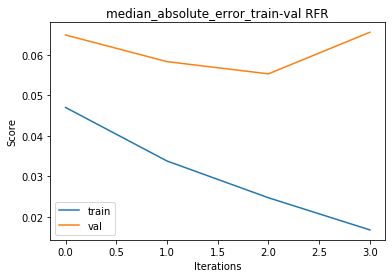

<Figure size 432x288 with 0 Axes>

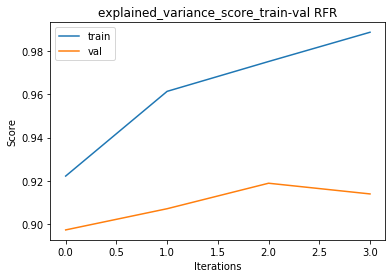

<Figure size 432x288 with 0 Axes>

In [142]:
%time result, models = train(models, X, Y, iterations=5)
result

In [14]:
y_test.head(10)

2424    0.100000
2779    1.457143
2011    1.181818
986     0.031250
3298    0.120000
3707    0.200000
2967    0.242424
1453    0.038462
3849    1.583333
2871    1.485714
Name: SaleRateNew, dtype: float64

#### Save and Load Machine Learning Models

In [103]:
from joblib import dump, load
dump(models['ElasticNet'], 'ElasticNet.joblib')

['ElasticNet.joblib']

In [104]:
ElasticNet = load('ElasticNet.joblib') 

In [105]:
from joblib import dump, load
dump(models['Lasso'], 'Lasso.joblib')

['Lasso.joblib']

In [106]:
Lasso = load('Lasso.joblib') 

In [107]:
from joblib import dump, load
dump(models['Ridge'], 'Ridge.joblib')

['Ridge.joblib']

In [108]:
Ridge = load('Ridge.joblib') 

In [109]:
from joblib import dump, load
dump(models['ada'], 'ada.joblib') 

['ada.joblib']

In [110]:
ada = load('Ada.joblib') 

In [111]:
from joblib import dump, load
dump(models['GBM'], 'GBM.joblib')

['GBM.joblib']

In [112]:
GBM = load('GBM.joblib') 

In [113]:
from joblib import dump, load
dump(models['RFR'], 'RFR.joblib')

['RFR.joblib']

In [114]:
RFR = load('RFR.joblib') 

#### Tunning

In [27]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

ada_param = {
 'n_estimators': [50],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gbm_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'max_depth':[1,3,5,7,9],
 'loss' : ['ls', 'lad', 'huber', 'quantile']
 }

RFR_param = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


models2 = {'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X, Y).best_estimator_,
           'Ada': GridSearchCV(AdaBoostRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_,
           'GBM': GridSearchCV(GradientBoostingRegressor(), 
                               param_grid=gbm_param).fit(X, Y).best_estimator_,
           'RFR': GridSearchCV(RandomForestRegressor(), 
                              param_grid=RFR_param).fit(X, Y).best_estimator_}


Running  Ridge
1234
Running  Ada
1234
Running  GBM
1234
Running  RFR
1234Wall time: 4min 20s


(      Ridge       Ada       GBM       RFR
 0  0.644343  0.719512  0.673872  0.208781
 1  0.692095  0.771966  0.760973  0.237176
 2  0.482903  0.404804  0.372075  0.676864
 3  0.460479  0.471528  0.360717  0.672271
 4  0.492198  0.269702  0.440410  1.085804
 5  0.412949  0.266637  0.320217  1.031927
 6  0.374566  0.323540  0.156462  0.607253
 7  0.378324  0.387334  0.164207  0.575017
 8  0.646950  0.781901  0.765840  0.216611
 9  0.692095  0.819869  0.840293  0.260818,
 {'Ridge': Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001),
  'Ada': AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='exponential',
                    n_estimators=50, random_state=None),
  'GBM': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='quantile', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
         

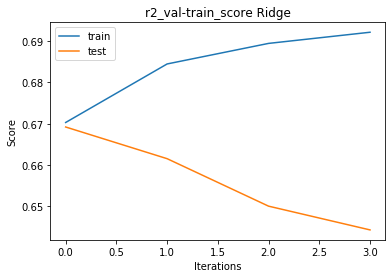

<Figure size 432x288 with 0 Axes>

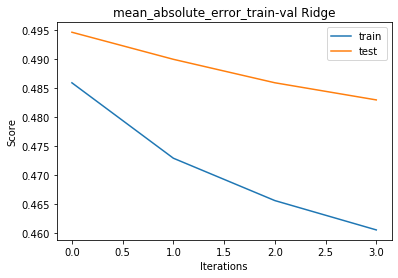

<Figure size 432x288 with 0 Axes>

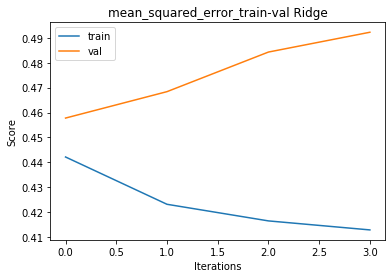

<Figure size 432x288 with 0 Axes>

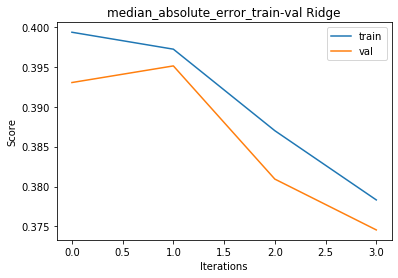

<Figure size 432x288 with 0 Axes>

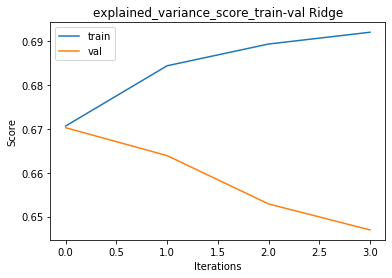

<Figure size 432x288 with 0 Axes>

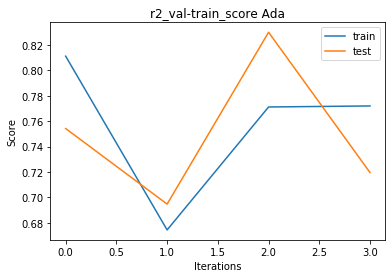

<Figure size 432x288 with 0 Axes>

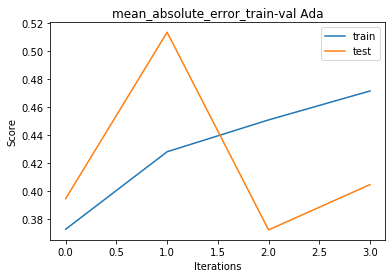

<Figure size 432x288 with 0 Axes>

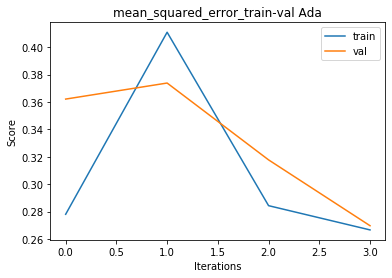

<Figure size 432x288 with 0 Axes>

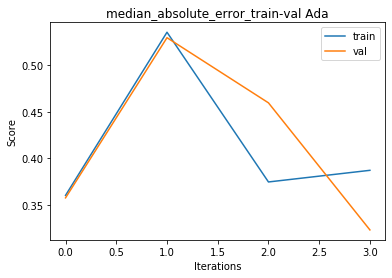

<Figure size 432x288 with 0 Axes>

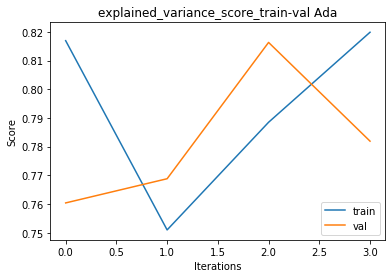

<Figure size 432x288 with 0 Axes>

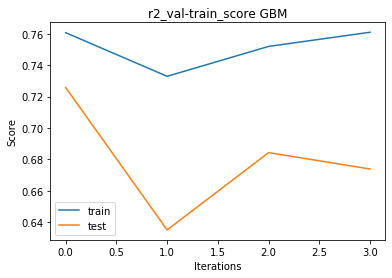

<Figure size 432x288 with 0 Axes>

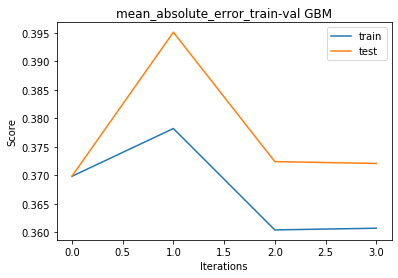

<Figure size 432x288 with 0 Axes>

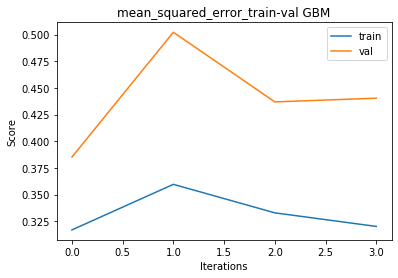

<Figure size 432x288 with 0 Axes>

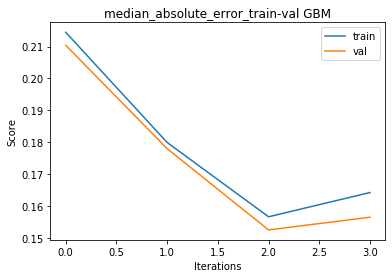

<Figure size 432x288 with 0 Axes>

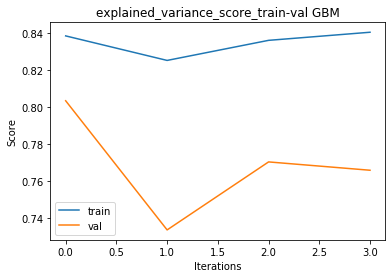

<Figure size 432x288 with 0 Axes>

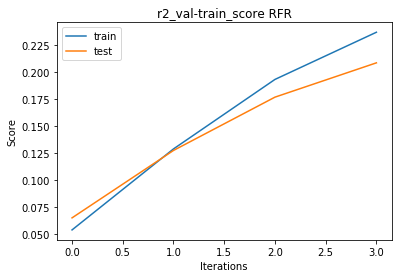

<Figure size 432x288 with 0 Axes>

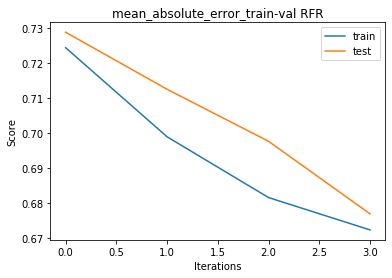

<Figure size 432x288 with 0 Axes>

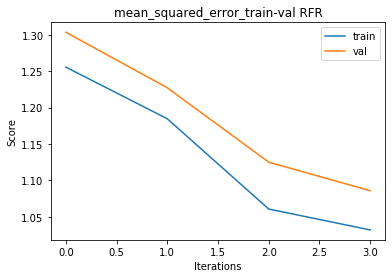

<Figure size 432x288 with 0 Axes>

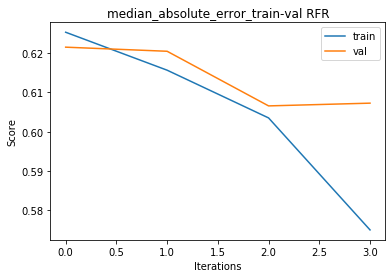

<Figure size 432x288 with 0 Axes>

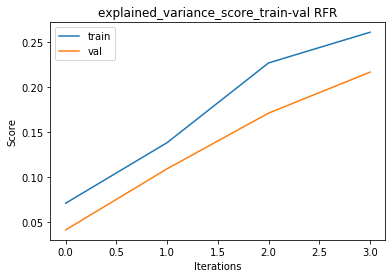

<Figure size 432x288 with 0 Axes>

In [28]:
%time train(models2, X, Y)

#### Model prediction with Testing

In [133]:
#model prediction with testing
from matplotlib import pyplot as plt
%matplotlib inline

def test2(models, X, Y, iterations = 5):
    results = {}
    for i in models:
        print("\nRunning ", i)
        table = dict()
        for j in range(1, iterations):
            print(j, end='')
            table['r2_test'] = metrics.r2_score(y_test, models[i].predict(X_test))
            table['r2_train'] = metrics.r2_score(y_train, models[i].predict(X_train))
            table['mae_test'] = metrics.mean_absolute_error(y_test, models[i].predict(X_test))
            table['mae_train'] = metrics.mean_absolute_error(y_train, models[i].predict(X_train))
            table['mse_test'] = metrics.mean_squared_error(y_test, models[i].predict(X_test))
            table['mse_train'] = metrics.mean_squared_error(y_train, models[i].predict(X_train))
            table['mabe_test'] = metrics.median_absolute_error(y_test, models[i].predict(X_test))
            table['mabe_train'] = metrics.median_absolute_error(y_train, models[i].predict(X_train))
            table['mevs_test'] = metrics.explained_variance_score(y_test, models[i].predict(X_test))
            table['mevs_train'] = metrics.explained_variance_score(y_train, models[i].predict(X_train))
            #R2 score
        fig, ax = plt.subplots()       
        plt.xlabel('Iterations') 
        plt.ylabel('Score') 
        ax.plot(table['r2_test'], label='train')
        ax.plot(['r2_train'], label='test')
        plt.title("r2_val-train_score " + i)
        ax.legend()
        plt.figure()
             
        results[i] = table
    return pd.DataFrame(results), models

In [143]:
from joblib import dump, load
models = {'ElasticNet': load('ElasticNet.joblib'),
          'Lasso': load('Lasso.joblib'), 
          'Ridge': load('Ridge.joblib'),
          'ada'  : load('ada.joblib'),
          'GBM'  : load('GBM.joblib'),
          'RFR'  : load('RFR.joblib')}

In [144]:
%time result, models = test2(models, X, Y)
result


Running  Lasso
1

ValueError: shapes (420,464) and (463,) not aligned: 464 (dim 1) != 463 (dim 0)

,ElasticNet,Lasso,Ridge,GBM,ada,RFR
0,0.677083,0.668633,0.684639,0.919783,0.906465,0.911692
1,0.779642,0.776833,0.811136,0.958033,0.919757,0.988922
2,0.419234,0.427152,0.402497,0.177772,0.212009,0.174882
3,0.396797,0.402444,0.349878,0.142914,0.231616,0.060675
4,0.342249,0.351205,0.334241,0.084810,0.094721,0.091551
5,0.279468,0.283031,0.239527,0.053224,0.082141,0.014182
6,0.332637,0.344961,0.285223,0.070346,0.084095,0.065637
7,0.335032,0.344041,0.275520,0.064758,0.175874,0.016759
8,0.680342,0.672044,0.687539,0.920275,0.912454,0.913997
9,0.779642,0.776833,0.811136,0.958033,0.937630,0.988678


In [34]:
for i in result:
    print(dict(result[i]))

{'r2_test': 0.5721683377914588, 'r2_train': 0.6700906868450269, 'mae_test': 0.4481352151150305, 'mae_train': 0.48542538458591805, 'mse_test': 0.34633250115477315, 'mse_train': 0.4424602921675723, 'mabe_test': 0.40112274556797534, 'mabe_train': 0.40699316250632905, 'mevs_test': 0.5732428673546381, 'mevs_train': 0.6700906868450269}
{'r2_test': 0.5704548745520612, 'r2_train': 0.6695999188721289, 'mae_test': 0.44958072608490257, 'mae_train': 0.48678655354498274, 'mse_test': 0.34771956074328964, 'mse_train': 0.44311848922966296, 'mabe_test': 0.40364833584653403, 'mabe_train': 0.4090153752781981, 'mevs_test': 0.5715850613385692, 'mevs_train': 0.6695999188721289}
{'r2_test': 0.5774963504040125, 'r2_train': 0.7251772453166718, 'mae_test': 0.420216058977424, 'mae_train': 0.42914773221403246, 'mse_test': 0.3420194404412104, 'mse_train': 0.3685805507235328, 'mabe_test': 0.3245969454872494, 'mabe_train': 0.32472014683694383, 'mevs_test': 0.5782446823655427, 'mevs_train': 0.7251772453166719}
{'r2_t

In [35]:
import seaborn as sb

r2_test


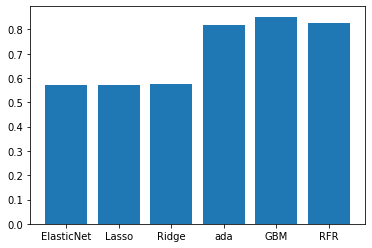

r2_train


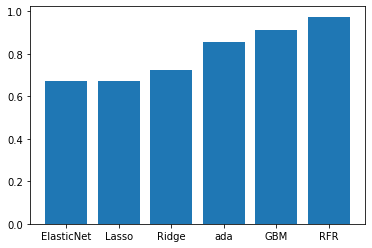

mae_test


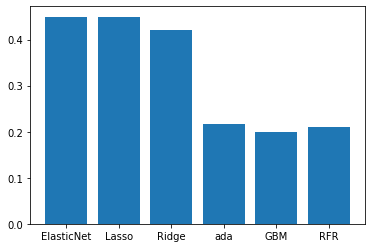

mae_train


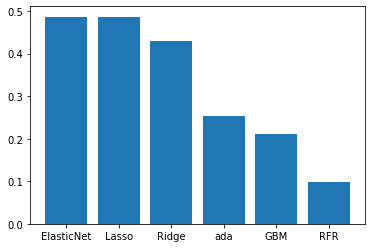

mse_test


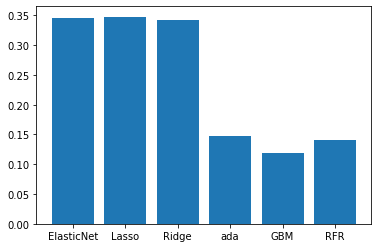

mse_train


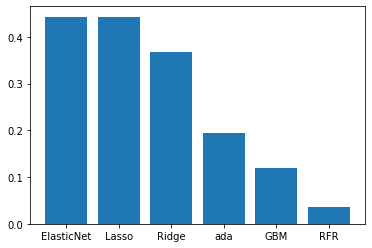

mabe_test


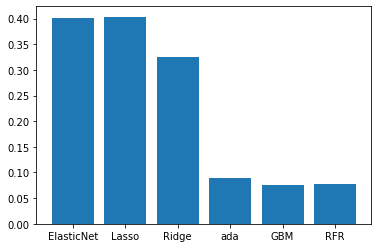

mabe_train


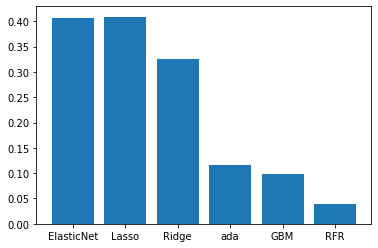

mevs_test


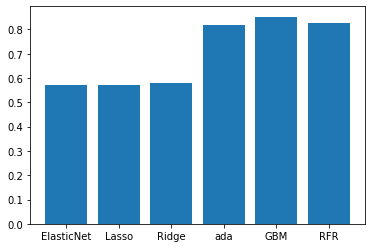

mevs_train


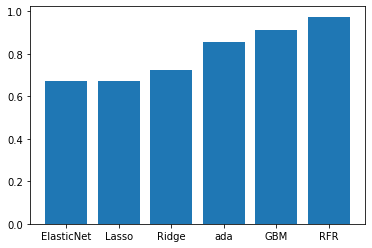

In [36]:
import matplotlib.pyplot as plt
result = result.transpose()
for key in result:
    print(key)
    plt.bar(range(len(dict(result[key]))), list(dict(result[key]).values()), align='center')
    plt.xticks(range(len(dict(result[key]))), list(dict(result[key]).keys()))
    plt.show()

#### Number of days prediction (i.e Blowout period)

In [40]:
y_pred = GBM.predict(X_test)
print(y_pred[:10])
print(y_test.head(10))

[0.14168517 1.02742495 0.98605142 0.10791901 0.13361216 0.1415221
 0.19402816 0.05164171 1.16157546 1.07449154]
2424    0.100000
2779    1.457143
2011    1.181818
986     0.031250
3298    0.120000
3707    0.200000
2967    0.242424
1453    0.038462
3849    1.583333
2871    1.485714
Name: SaleRateNew, dtype: float64


In [41]:
y_test

2424    0.100000
2779    1.457143
2011    1.181818
986     0.031250
3298    0.120000
          ...   
416     0.348837
1823    0.086957
1167    0.016393
2458    1.275000
2425    0.150000
Name: SaleRateNew, Length: 420, dtype: float64

In [46]:
#blowout period identification using best performing algorithm
X_test['y_pred'] = y_pred
X_test['blowout_pred'] = pd.DataFrame({"Days" : X_test.Inventory / X_test['y_pred']})
X_test['blowout'] = pd.DataFrame({"Days" : X_test.Inventory / y_test})
X_test.head(10)

,Price(USD),Cost price,Inventory,Shipping,weight(lb),0,1,2,3,4,...,452,453,454,455,456,457,y_pred,blowout_pred,blowout_test,blowout
2424,16.13,12.0975,4,2.5,0.26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141685,28.231607,40.000000,40.000000
2779,6.38,4.7850,51,0.0,0.23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.027425,49.638662,35.000000,35.000000
2011,3.59,2.6925,52,0.0,0.22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.986051,52.735587,44.000000,44.000000
986,173.23,129.9225,2,2.5,3.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.107919,18.532416,64.000000,64.000000
3298,398.72,299.0400,3,2.5,0.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.133612,22.453046,25.000000,25.000000
3707,196.80,147.6000,3,2.5,4.40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141522,21.198103,15.000000,15.000000
2967,199.87,149.9025,8,10.0,37.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.194028,41.231128,33.000000,33.000000
1453,1023.97,767.9775,2,10.0,82.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.051642,38.728386,52.000001,52.000001
3849,30.65,22.9875,20,2.5,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.161575,17.217995,12.631579,12.631579
2871,110.70,83.0250,52,2.5,5.56,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.074492,48.394983,35.000000,35.000000
